In [1]:
import pca_processor as pca_p
from data_processor import load_config, Preprocessor
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# 1) Load configuration
cfg = load_config("config.json")

# 2) Transform .dat files and save in various formats
dp = Preprocessor(cfg)

In [3]:
a=dp.preprocess(save_json=False)

c:\Users\kenta\python\Ishikawa\CMGG_FS_ML\code\data_processor.py:64: UserWarning: loadtxt: input contained no data: "../data/fermi_line_kx_ky_Xpoint_up/fermi_line_Ga0.00.dat"
  d = np.loadtxt(path)
c:\Users\kenta\python\Ishikawa\CMGG_FS_ML\code\data_processor.py:64: UserWarning: loadtxt: input contained no data: "../data/fermi_line_kx_ky_ganma_down/fermi_line_Ga0.00.dat"
  d = np.loadtxt(path)


In [4]:
# list(a.values())

In [5]:
ds = dp.gaussian_broadening_seq(a, sigma=4, save_h5=True)
ds

<xarray.Dataset> Size: 53MB
Dimensions:            (composition: 101, x: 255, y: 255, spin_polarization: 101)
Coordinates:
  * composition        (composition) float64 808B 0.0 1.0 2.0 ... 99.0 100.0
  * x                  (x) int64 2kB 0 1 2 3 4 5 6 ... 249 250 251 252 253 254
  * y                  (y) int64 2kB 0 1 2 3 4 5 6 ... 249 250 251 252 253 254
  * spin_polarization  (spin_polarization) float64 808B 0.9668 0.9619 ... 0.6427
Data variables:
    up                 (composition, x, y) float32 26MB 0.0 0.0 ... 0.08058
    dn                 (composition, x, y) float32 26MB 0.0 0.0 0.0 ... 0.0 0.0
    filenames          (composition) <U21 8kB 'fermi_line_Ga0.00.dat' ... 'fe...
Attributes:
    sigma:        4
    description:  Gaussian-broadened up/down images

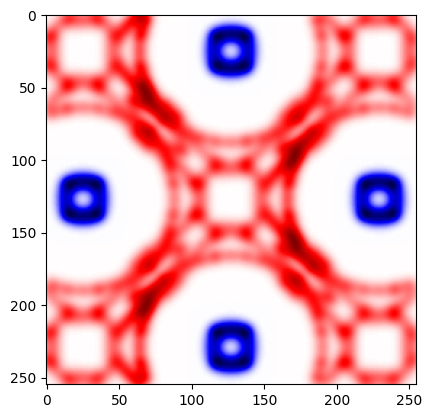

In [6]:
p = ds.up.sel(composition=50).values - ds.dn.sel(composition=50)
plt.imshow(p, cmap="seismic")

In [7]:
h5 = pca_p.load_h5data(os.path.join(cfg["BASE_PATH"], "data_sigma4.h5"))

In [9]:
data = pca_p.combine_updn_data(h5)

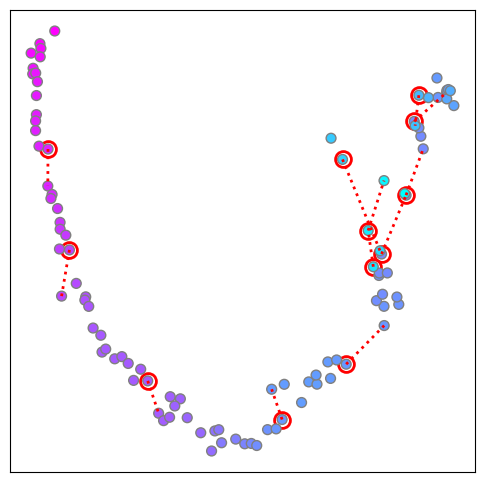

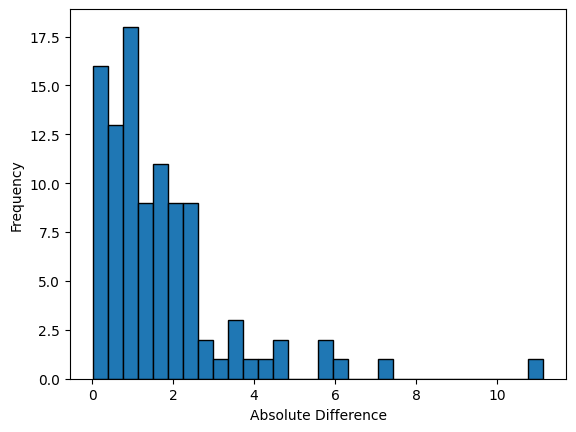

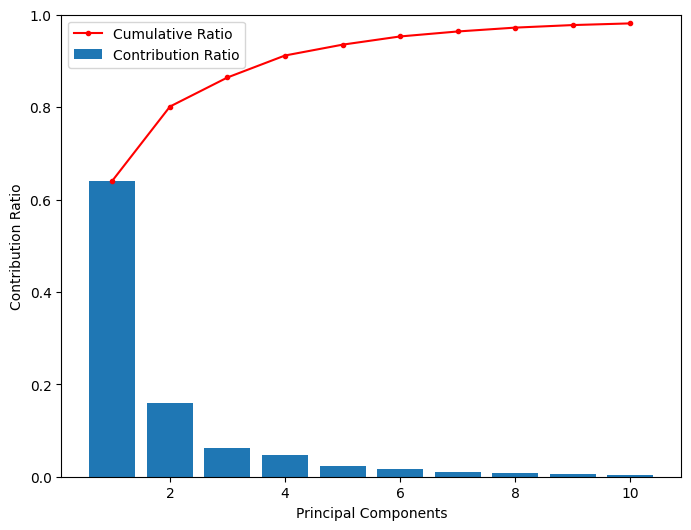

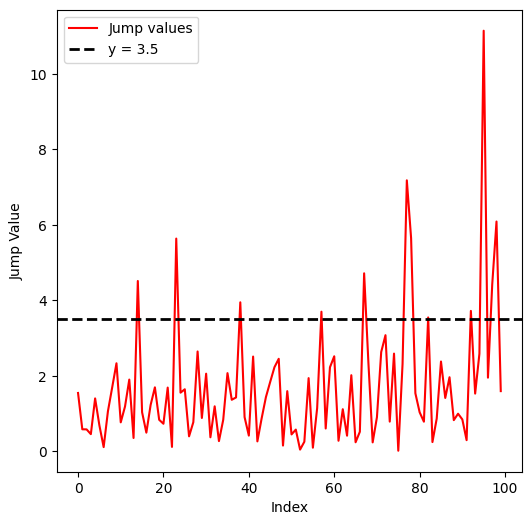

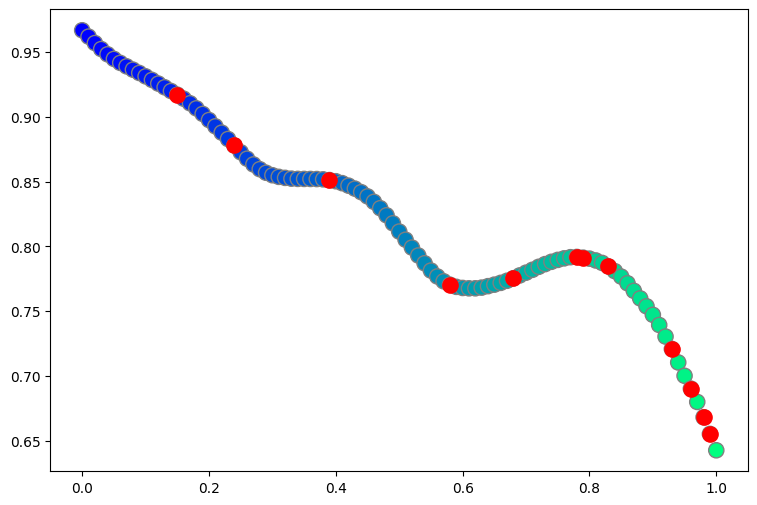

In [10]:
threshold = 3.5
pca, pca_result = pca_p.perform_pca(data)
score, jump_list, indices_above_threshold = pca_p.detect_outliers(pca_result, threshold)
pca_p.plot_results(score, jump_list, indices_above_threshold, h5, threshold, pca)